Projet Python

----

## What is starcraft ?

Starcraft is a competitive game developed by Blizzard. There is a ranked system within the game : (Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-7 (Ordinal) because the Professionnal leagues is not in the game). Players are placed in a league after having completed 5 placement matches. 

## Our Problematic ?

We want to help the constructor. Why ? Imagine a player has play starcraft for a long time but as never played in a rank situation (game). We can make the player play 5 games with other player in rank (incremental if he win) and estimate based on his stats what rank he deserve.

# Import library

In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import chart_studio.plotly as py
import scipy as sp
from sklearn.ensemble import ExtraTreesClassifier
import plotly.express as px
from sklearn import preprocessing
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [497]:
#cf.set_config_file(theme='pearl')

# Import Data

Attribute Information:

1. GameID: Unique ID number for each game (integer)

2. LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)

3. Age: Age of each player (integer)

4. HoursPerWeek: Reported hours spent playing per week (integer)

5. TotalHours: Reported total hours spent playing (integer)

6. APM: Action per minute (continuous)

7. SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)

8. AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp (continuous)

9. UniqueHotkeys: Number of unique hotkeys used per timestamp (continuous)

10. MinimapAttacks: Number of attack actions on minimap per timestamp (continuous)

11. MinimapRightClicks: number of right-clicks on minimap per timestamp (continuous)

12. NumberOfPACs: Number of PACs per timestamp (continuous)

13. GapBetweenPACs: Mean duration in milliseconds between PACs (continuous)

14. ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)

15. ActionsInPAC: Mean number of actions within each PAC (continuous)

16. TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)

17. WorkersMade: Number of SCVs, drones, and probes trained per timestamp (continuous)

18. UniqueUnitsMade: Unique unites made per timestamp (continuous)

19. ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp (continuous)

20. ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp (continuous)

In [498]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv")
df=df.replace('?', np.nan)
df

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3340 non-null   object 
 3   HoursPerWeek          3339 non-null   object 
 4   TotalHours            3338 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

# Data cleaning

In [ ]:
df["Age"] = df["Age"].apply(float)
df["HoursPerWeek"] = df["HoursPerWeek"].apply(float)
df["TotalHours"] = df["TotalHours"].apply(float)

We look to see the number of missing value by column

In [ ]:
df.isna().sum()

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

In [ ]:
#check if the ranked distribution is affected if we remove the NAN
df.pivot_table(index="LeagueIndex", 
               values=["Age","HoursPerWeek","TotalHours"], 
               aggfunc= lambda x: x.isna().sum())

,Age,HoursPerWeek,TotalHours
LeagueIndex,,,
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,2
6,0,0,0
7,0,0,0
8,55,55,55


We'll remove the professionnal as our problematic focus on the rank from 1 to 7:

In [ ]:
df = df[df['LeagueIndex'] != 8]

We'll also remove the Nan value of the 5 rank as they are low in number

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

We ll see later if the age and the number of hour played is really important for our estimation

In [ ]:
len(df["GameID"].unique()) == len(df["GameID"])

True

We can assume the GameID doesn't provide any additionnal information

In [ ]:
data = df.drop('GameID', 1)

/var/folders/7t/2dzhx06d1d15wbh_ng5knlx00000gn/T/ipykernel_24534/4223245916.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



# Data representation :

We visualise the data to see if some feature can be remove. 
We'll also look for correlation between features and the leagueIndex

#### Overview of the data :

In [ ]:
data.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000
mean,4.120731,21.650389,15.909527,960.421809,114.575763,0.004023,0.000364,4.316357,0.000094,0.000380,0.003433,40.713819,64.209584,5.266955,22.116836,0.001031,6.541043,0.000060,0.000142
std,1.448170,4.206357,11.964495,17318.133922,48.111912,0.004726,0.000210,2.333322,0.000159,0.000359,0.000966,17.057191,19.037394,1.500605,7.440875,0.000520,1.859049,0.000112,0.000266
min,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,3.000000,19.000000,8.000000,300.000000,79.231500,0.001245,0.000202,3.000000,0.000000,0.000139,0.002743,29.326600,50.886425,4.261525,17.000000,0.000682,5.000000,0.000000,0.000000
50%,4.000000,21.000000,12.000000,500.000000,107.070300,0.002445,0.000349,4.000000,0.000039,0.000278,0.003376,37.058900,61.296100,5.087050,22.000000,0.000904,6.000000,0.000000,0.000020
75%,5.000000,24.000000,20.000000,800.000000,140.156100,0.004945,0.000493,6.000000,0.000113,0.000508,0.004003,48.510425,74.032525,6.027350,27.000000,0.001258,8.000000,0.000087,0.000182
max,7.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


### We clean the data of outlier

We can clearly see in the above data description tha someone played 1000000 Hours (it's around 114 years) which is impossible

In [ ]:
fig = px.scatter(data,  x='Age', y='TotalHours')

fig.show()

We ll remove all the outlier in the total hour:

By searching a bit online we can find that some of the veteran pros who played the longest must have around 25 000 Hours

In [ ]:
data = data[data['TotalHours'] < 25000]

#### Z-score Filtering

3 Standard Deviations from the Mean: 99.7%

In [ ]:
std = 3
data = data[data.apply(lambda x: np.abs(x - x.mean()) / x.std() < std).all(axis=1)]

#### Quantile Filtering (not use here)

In [ ]:

#df = df.drop(df[df < df.quantile(0.99),df > df.quantile(0.01)])

#or replace outlier by mean (eq to Z-score < 3)
def outliers_IQR(df, remove = True, a = 0.25, b = 0.75):
    q1, q3 =df.quantile(a), df.quantile(b)
    IQR = q3 - q1
    upper, lower = df[~(df>(q3+1.5*IQR))].max(), df[~(df<(q1-1.5*IQR))].min()
    if remove:
        return np.where(df > upper,0,np.where(df < lower,0,df)).dropna().reset_index()
    return np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))


We also want a good looking curve of distribution (normal)

In [ ]:
default = "LeagueIndex"
title = f"Dropdown menu : see distribution of column and their {default}"
fig = px.histogram(data, x=default, color='LeagueIndex', title=title,barmode="stack")
buttons = []

for col in list(data.columns):
    fig_host = px.histogram(data, x=col, color='LeagueIndex',barmode="stack")
    buttons.append(dict(label=col,method="update",
            args=[{"x": [trace['x'] for trace in fig_host._data],"title": f"Dropdown {col}"}])
    )

fig.update_traces(overwrite=True, marker={"opacity": 0.6}) 
fig.update_layout(
    updatemenus=[dict(type="dropdown",direction="down",showactive=True,buttons=buttons)]
)

fig.show()

We can see that some plot have a skewed distribution

In [ ]:
data.skew()

LeagueIndex            -0.324182
Age                     0.698126
HoursPerWeek            1.065103
TotalHours              1.558711
APM                     0.647340
SelectByHotkeys         1.884467
AssignToHotkeys         0.472265
UniqueHotkeys           0.222238
MinimapAttacks          2.033445
MinimapRightClicks      1.332314
NumberOfPACs            0.479753
GapBetweenPACs          0.827207
ActionLatency           0.612568
ActionsInPAC            0.618456
TotalMapExplored        0.410028
WorkersMade             1.070815
UniqueUnitsMade         0.160916
ComplexUnitsMade        1.879516
ComplexAbilitiesUsed    2.050001
dtype: float64

In [ ]:
#def normalize_df(dt):
 #   d = preprocessing.normalize(dt.copy())
 #   tmp = pd.DataFrame(d, columns=dt.columns)
 # tmp["LeagueIndex"] = dt["LeagueIndex"]
 #  return tmp

#normalize_df(data.copy()).skew()

#Pas besoin de normaliser, je crois vue voir en dessous ()

# General overview :

### We will now compute the mean of some features per league and plot it with barplot

In [ ]:
mean_HoursPerWeek=[]
mean_TotalHours=[]
mean_Age=[]

mean_APM=[]
mean_MinimapAttacks=[]
mean_NumberOfPACs=[]

mean_GapBetweenPACs=[]
mean_ActionLatency=[]
mean_TotalMapExplored=[]


for k in range(1,9):
    x=df.loc[df['LeagueIndex']==k]['HoursPerWeek'].mean()
    mean_HoursPerWeek.append(x)
    x=df.loc[df['LeagueIndex']==k]['TotalHours'].mean()
    mean_TotalHours.append(x)
    x=df.loc[df['LeagueIndex']==k]['Age'].mean()
    mean_Age.append(x)
    
    x=df.loc[df['LeagueIndex']==k]['APM'].mean()
    mean_APM.append(x)
    x=df.loc[df['LeagueIndex']==k]['MinimapAttacks'].mean()
    mean_MinimapAttacks.append(x)
    x=df.loc[df['LeagueIndex']==k]['NumberOfPACs'].mean()
    mean_NumberOfPACs.append(x)
    
    x=df.loc[df['LeagueIndex']==k]['GapBetweenPACs'].mean()
    mean_GapBetweenPACs.append(x)
    x=df.loc[df['LeagueIndex']==k]['ActionLatency'].mean()
    mean_ActionLatency.append(x)
    x=df.loc[df['LeagueIndex']==k]['TotalMapExplored'].mean()
    mean_TotalMapExplored.append(x)

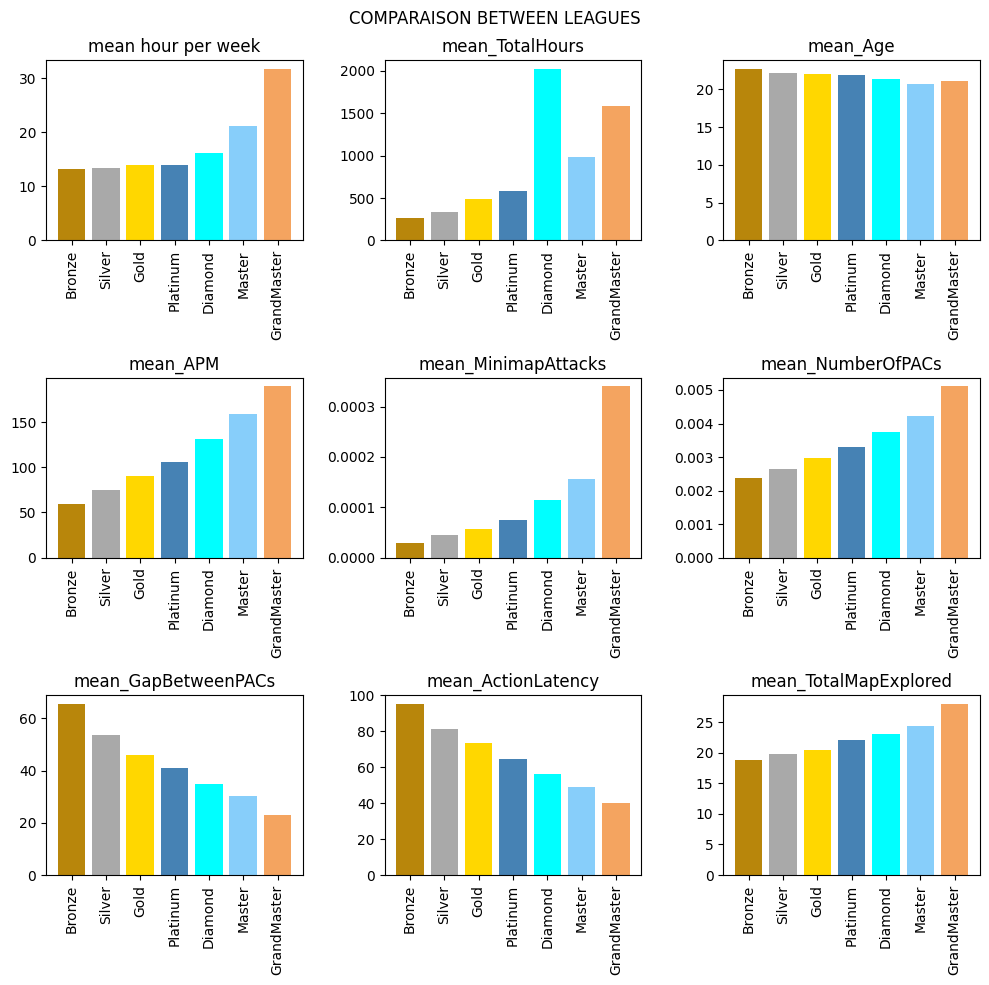

In [ ]:
import seaborn as sns

keys1 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professional']
colors = ["darkgoldenrod","darkgray","gold","steelblue","cyan","lightskyblue","sandybrown","lightcoral"]
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(10,10))
fig.suptitle('COMPARAISON BETWEEN LEAGUES')

axes[0,0].bar(keys1,mean_HoursPerWeek,color = colors)
axes[0,0].set_title('mean hour per week')
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,1].bar(keys1,mean_TotalHours,color = colors)
axes[0,1].set_title('mean_TotalHours')
axes[0,1].tick_params(axis='x', rotation=90)
axes[0,2].bar(keys1,mean_Age,color = colors)
axes[0,2].set_title('mean_Age')
axes[0,2].tick_params(axis='x', rotation=90)



axes[1,0].bar(keys1,mean_APM,color = colors)
axes[1,0].set_title('mean_APM')
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,1].bar(keys1,mean_MinimapAttacks,color = colors)
axes[1,1].set_title('mean_MinimapAttacks')
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,2].bar(keys1,mean_NumberOfPACs,color = colors)
axes[1,2].set_title('mean_NumberOfPACs')
axes[1,2].tick_params(axis='x', rotation=90)


axes[2,0].bar(keys1,mean_GapBetweenPACs,color = colors)
axes[2,0].set_title('mean_GapBetweenPACs')
axes[2,0].tick_params(axis='x', rotation=90)
axes[2,1].bar(keys1,mean_ActionLatency,color = colors)
axes[2,1].set_title('mean_ActionLatency')
axes[2,1].tick_params(axis='x', rotation=90)
axes[2,2].bar(keys1,mean_TotalMapExplored,color = colors)
axes[2,2].set_title('mean_TotalMapExplored')
axes[2,2].tick_params(axis='x', rotation=90)

fig.tight_layout()

Number of players per rank :

<BarContainer object of 7 artists>

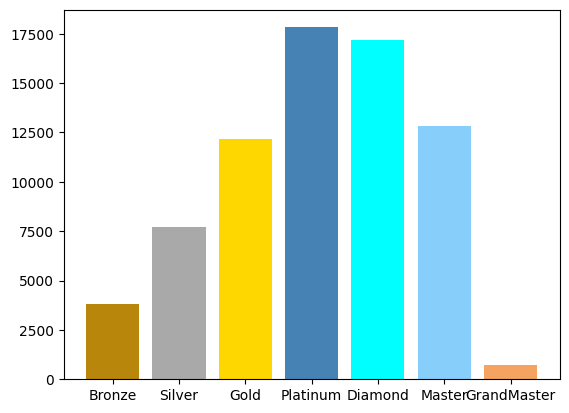

In [ ]:
keys1 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster']
colors = ["darkgoldenrod","darkgray","gold","steelblue","cyan","lightskyblue","sandybrown","lightcoral"]
Age_per_rank = []
n = len(keys1)
for k in range(1,n+1):
    x=df.loc[df['LeagueIndex']==k]['Age'].sum()
    Age_per_rank.append(x)
plt.bar(keys1,Age_per_rank,color = colors)

## Machine Learning to predict ranks based on chosen features

We ll try to find for each column the best transformation, se we can have a really nice distributed curve

In [ ]:
data.shape

(2720, 19)

In [ ]:
from sklearn.model_selection import train_test_split

y, X = data["LeagueIndex"], data.drop("LeagueIndex", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)
tmp = X_train.copy()
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2040, 18)
(680, 18)
(2040,)
(680,)


In [ ]:
transf_data = X_train
normal_data = tmp
transf_data['LeagueIndex'], normal_data['LeagueIndex'] = Y_train, Y_train
transf_data.head()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,LeagueIndex
1272,22.0,6.0,100.0,73.5396,0.000154,0.000019,1,0.000058,0.000250,0.002670,62.8406,65.0360,5.1583,15,0.000711,6,0.000000,0.000096,2
763,22.0,10.0,80.0,51.1098,0.001030,0.000094,5,0.000013,0.000310,0.002443,80.1993,93.5912,3.5746,35,0.000342,6,0.000000,0.000000,2
2914,25.0,20.0,200.0,70.1022,0.001257,0.000229,5,0.000000,0.000076,0.003258,55.7176,67.9766,3.5965,17,0.000762,4,0.000000,0.000000,3
2319,21.0,20.0,800.0,108.9282,0.002387,0.000234,4,0.000000,0.000156,0.003478,50.3258,65.9496,5.1457,27,0.001890,8,0.000283,0.000390,4
2410,19.0,10.0,500.0,187.1862,0.007175,0.000507,6,0.000018,0.000320,0.004819,26.4177,38.3026,6.0590,25,0.001174,9,0.000196,0.000462,6


In [ ]:
default = "LeagueIndex"
title = f"Dropdown menu : see distribution of column and their {default}"

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("normal data", "clean data"),
)

fig.add_trace(go.Histogram(histfunc="count",x=normal_data["LeagueIndex"]), row=1, col=1)
fig.add_trace(go.Histogram(histfunc="count",x=transf_data["LeagueIndex"]), row=1, col=2)

buttons = []
for colunm in list(X_train.columns):
    fig_host = make_subplots(
        rows=1, cols=2,
        subplot_titles=("normal data", "clean data"),
    )
    fig_host.add_trace(go.Histogram(histfunc="count",x=normal_data[colunm]), row=1, col=1)
    fig_host.add_trace(go.Histogram(histfunc="count",x=transf_data[colunm]), row=1, col=2)

    buttons.append(dict(label=colunm,method="update",
            args=[{"x": [trace['x'] for trace in fig_host._data],"title": f"Dropdown {colunm}"}])
    )

fig.update_traces(overwrite=True, marker={"opacity": 0.6}) 
fig.update_layout(
    updatemenus=[dict(type="dropdown",direction="down",showactive=True,buttons=buttons)]
)

fig.show()

### Feature

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. 

The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.


Irrelevant or partially relevant features can negatively impact model performance.

Feature selection and Data cleaning should be the first and most important step of your model designing.

##### Correlation Matrix with Heatmap

Text(0.5, 1.0, 'Features Correlating with the Rank')

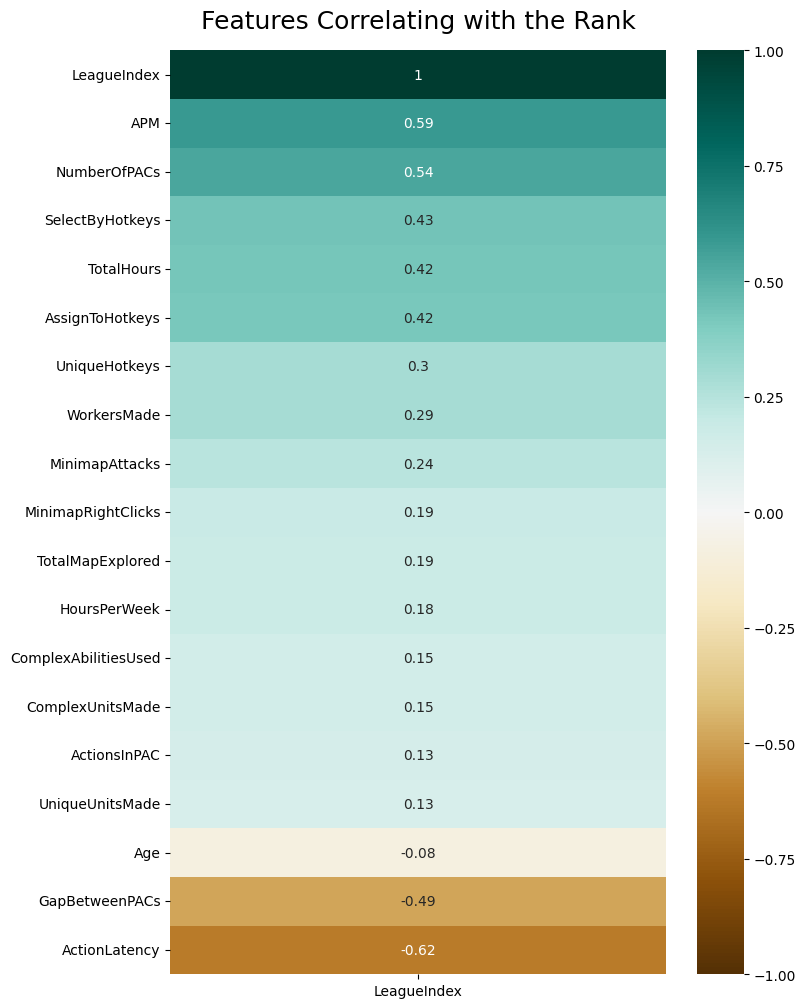

In [ ]:
plt.figure(figsize=(8, 12))
res1 = transf_data.corr()[['LeagueIndex']].sort_values(by='LeagueIndex', ascending=False)
heatmap = sns.heatmap(res1, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the Rank', fontdict={'fontsize':18}, pad=16)

#### Univariate Selection

Use of the chi-squared (chi²) statistical test for non-negative features

we could have also use : sklearn.feature_selection.SelectPercentile

In [ ]:
X = transf_data.iloc[:,:transf_data.shape[1] - 1]
y = transf_data.iloc[:,-1]

bestf = SelectKBest(score_func=chi2, k=12)
fit = bestf.fit(X,y)

res2 = pd.DataFrame(fit.scores_,index=X.columns)
res2.columns = ['Chi2']
res2.nlargest(10,'Chi2')

,Chi2
TotalHours,114741.808839
APM,10800.007806
ActionLatency,3346.809368
GapBetweenPACs,2540.801498
HoursPerWeek,634.773232
UniqueHotkeys,242.916787
TotalMapExplored,169.225779
UniqueUnitsMade,20.691914
Age,14.492085
ActionsInPAC,13.822761


#### Feature importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers

<AxesSubplot: >

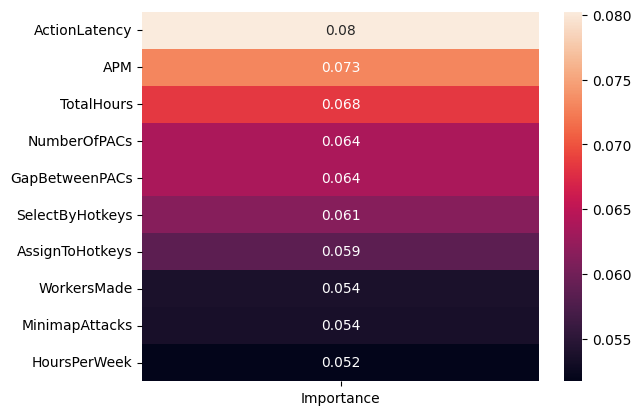

In [ ]:
X = transf_data.iloc[:,:transf_data.shape[1] - 1]
y = transf_data.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(X,y)

res3 = pd.DataFrame(model.feature_importances_, index=X.columns)
res3.columns = ['Importance']
sns.heatmap(res3.nlargest(10, 'Importance'), annot=True)

### Base exclusivly on this statisticle value, we can choose which column are representative for our problematics

In [ ]:
res1 = res1.apply(lambda i : abs(i))

score = pd.concat([res3, res2, res1],axis=1)
score.columns = ['Importance', 'Chi2','Corr']
score = score.dropna()
score = score.sort_values(by=['Importance'],ascending=[False])
score

,Importance,Chi2,Corr
ActionLatency,0.080251,3346.809368,0.623269
APM,0.073027,10800.007806,0.589954
TotalHours,0.068369,114741.808839,0.422767
NumberOfPACs,0.063777,0.141606,0.542167
GapBetweenPACs,0.063691,2540.801498,0.489137
SelectByHotkeys,0.061354,1.314518,0.433103
AssignToHotkeys,0.058564,0.037912,0.416868
WorkersMade,0.053762,0.035813,0.293621
MinimapAttacks,0.053585,0.017443,0.237200
HoursPerWeek,0.051714,634.773232,0.181517


Columns chosen are :

In [ ]:
features = ["TotalHours","APM","SelectByHotkeys","AssignToHotkeys","MinimapAttacks","NumberOfPACs","GapBetweenPACs","ActionLatency","ActionsInPAC","TotalMapExplored","WorkersMade"]

Data preprocessing

In [ ]:
#def clean_curve(dt):
#    for e in dt:
#       if e != "LeagueIndex":
            #we could have use Box-Cox Transformation Method but we have some null vale (even though we dont have negativ value)
            #dt[e], _ = sp.stats.yeojohnson(dt[e],lmbda=None)
    #return dt

from sklearn.preprocessing import PowerTransformer

X_train = X_train.drop("LeagueIndex", axis=1)

scaler = PowerTransformer()
scaler.fit(X_train)                 # only fit training data
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(X_train)                 # only fit training data
#X_train = scaler.transform(X_train)
#X_test  = scaler.transform(X_test)  # apply same transformation to test data

Starting with a linear regression

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000).fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.40147058823529413

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,Y_train)
knn.score(X_test, Y_test)

0.3205882352941177

Support Vector Machine

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,Y_train)
clf.score(X_test, Y_test)

0.4

stochastic gradient descent

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
sgd.fit(X_train, Y_train)
sgd.score(X_test, Y_test)

0.35

Decision Tree

In [ ]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
dtree.score(X_test, Y_test)

0.3205882352941177

Recursive feature elimination with cross-validation to select features.

In [ ]:
from sklearn.feature_selection import RFECV
estimator = reg
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train, Y_train)
selector.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True])

changer les features que l'on garde (à faire)

Grid search for Support Vector Machine

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'gamma' : [0.01, 0.02, 0.03]}

grid = GridSearchCV(svm.SVC(), parameters, n_jobs=-1, cv=5)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.4137254901960784 SVC(gamma=0.01)


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {  'C'      : [0.9, 1, 1.1, 1.2]             ,
                'gamma'  : [0.01, 0.02, 0.03]      }
grid = GridSearchCV(svm.SVC(), parameters, n_jobs=-1, cv=5)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.41666666666666663 SVC(C=1.1, gamma=0.01)


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {  'C'       : [0.9, 1, 1.1, 1.2]    ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.02],}
grid = GridSearchCV(svm.SVC(), parameters, n_jobs=-1, cv=5)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.4156862745098039 SVC(C=0.9, gamma=0.02)


GridSearch for LogisticRegression

In [ ]:
estimator.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {  'C'  : np.linspace(1, 4, 20)}
grid = GridSearchCV(LogisticRegression(max_iter=500), parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.42254901960784313 LogisticRegression(C=1.1578947368421053, max_iter=500)


In [ ]:
parameters = {  'C'  : np.linspace(3, 4, 50)}
grid = GridSearchCV(LogisticRegression(max_iter=500), parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.41715686274509806 LogisticRegression(C=3.0, max_iter=500)


GridSearch for Decision Tree

In [ ]:
tree.DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
parameters = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
grid = GridSearchCV(tree.DecisionTreeClassifier(), parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.3583333333333333 DecisionTreeClassifier(max_depth=5)


GridSearch for Lasso (linear model)

In [ ]:
from sklearn.linear_model import Lasso
parameters = {"max_iter" : [1000],
         "alpha" : np.linspace(0.001, 0.01, 20), 
         "selection": ["random", "cyclic"]}
grid = GridSearchCV(Lasso(), parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.5377871971234052 Lasso(alpha=0.003842105263157895, selection='random')


XGBoost

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

In [ ]:
from xgboost import XGBClassifier
algo = XGBClassifier()
algo.fit(X_train, Y_train)
algo.score(X_test, Y_test)

0.3602941176470588

GridSearch

In [ ]:
algo.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [325]:
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid = GridSearchCV(algo, parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

KeyboardInterrupt: 

Results : 0.41030738522954086 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

It took 15 min to compute if you want to try

## testing sklearn algo

In [441]:
# from sklearn import *

def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print( e)
        if verbose: print ("="*30)
    return algos

In [442]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))


===> cross_decomposition
CCA,PLSCanonical,PLSRegression,PLSSVD

===> decomposition
DictionaryLearning,FactorAnalysis,FastICA,IncrementalPCA,KernelPCA,LatentDirichletAllocation,MiniBatchDictionaryLearning,MiniBatchNMF,MiniBatchSparsePCA,NMF,PCA,SparseCoder,SparsePCA,TruncatedSVD

===> dummy
DummyClassifier,DummyRegressor

===> ensemble
AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,GradientBoostingClassifier,GradientBoostingRegressor,HistGradientBoostingClassifier,HistGradientBoostingRegressor,IsolationForest,RandomForestClassifier,RandomForestRegressor,RandomTreesEmbedding,StackingClassifier,StackingRegressor,VotingClassifier,VotingRegressor

===> feature_selection
GenericUnivariateSelect,RFE,RFECV,SelectFdr,SelectFpr,SelectFromModel,SelectFwe,SelectKBest,SelectPercentile,SequentialFeatureSelector,VarianceThreshold

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,GammaRegressor,HuberRegressor,Lars,

### Utiliser chaque algo et conserver les performances

In [443]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, Y_train)
        performance = algorithme.score(X_test, Y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print ("="*30)
   

Canonical Correlation Ana
n_components == 2, must be <= 1.
Partial Least Squares tra
n_components == 2, must be <= 1.
PLS regression.

    PLSR
0.572164119966386
Partial Least Square SVD.
n_components == 2, must be <= 1.
Dictionary learning.
'DictionaryLearning' object has no attribute 'scor
Factor Analysis (FA).
-22.578100679761086
FastICA


/Users/steven/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning:

Starting in v1.3, whiten='unit-variance' will be used by default.

/Users/steven/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



'FastICA' object has no attribute 'score'
Incremental principal com
'IncrementalPCA' object has no attribute 'score'
Kernel Principal componen
'KernelPCA' object has no attribute 'score'
Latent Dirichlet Allocati
Negative values in data passed to LatentDirichletA
Mini-batch dictionary lea


/Users/steven/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_dict_learning.py:2243: FutureWarning:

The default value of batch_size will change from 3 to 256 in 1.3.



'MiniBatchDictionaryLearning' object has no attrib
Mini-Batch Non-Negative M
Negative values in data passed to NMF (input X)
Mini-batch Sparse Princip
'MiniBatchSparsePCA' object has no attribute 'scor
Non-Negative Matrix Facto
Negative values in data passed to NMF (input X)
Principal component analy
-20.548829502018187
__init__() missing 1 required positional argument:
Sparse Principal Componen
'SparsePCA' object has no attribute 'score'
Dimensionality reduction
'TruncatedSVD' object has no attribute 'score'
DummyClassifier makes pre
0.2735294117647059
Regressor that makes pred
-0.002651220258498732
An AdaBoost classifier.
0.27941176470588236
An AdaBoost regressor.
0.5038701319725724
A Bagging classifier.
0.36911764705882355
A Bagging regressor.
0.5267991598982117
An extra-trees class
0.40441176470588236
An extra-trees regre
0.5596758069857426
Gradient Boosting for cla
0.38382352941176473
Gradient Boosting for reg
0.5694418462884837
Histogram-based Gradient
0.3897058823529412
Histogra

/Users/steven/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/Users/steven/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

0.5731395065165428
Lasso model fit with Leas
-0.002651220258498732
Cross-validated Lasso, us
0.5731884434446058
Lasso model fit with Lars


/Users/steven/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

/Users/steven/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScale

0.5732619460792647
Ordinary least squar
0.5719736672595834
Logistic Regression
0.4411764705882353
Logistic Regression CV (a


/Users/steven/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/steven/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/steven/

0.4338235294117647
Multi-task ElasticNet mod
For mono-task outputs, use ElasticNet
Multi-task L1/L2 ElasticN
For mono-task outputs, use ElasticNetCVCV
Multi-task Lasso model tr
For mono-task outputs, use ElasticNet
Multi-task Lasso model tr
For mono-task outputs, use LassoCVCV
Orthogonal Matching Pursu
0.41155819783745584
Cross-validated Orthogona
0.5466443953063626
Passive Aggressive Classi
0.32794117647058824
Passive Aggressive Regres
-0.06991377710096125
Linear perceptron classif
0.29411764705882354
Generalized Linear Model
0.4541022947140856
Linear regression model t


KeyboardInterrupt: 

### meilleur algo

In [56]:
best_algorithm, best_perf

(RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])), 0.3005988023952096)

### Performances de chaque algo :

In [57]:
performances

{'DummyClassifier makes pre': [0.2622754491017964],
 'An AdaBoost classifier.': [0.17005988023952096],
 'A Bagging classifier.': [0.22035928143712574],
 'A Bagging regressor.': [0.0535369666643738],
 'An extra-trees class': [0.25149700598802394],
 'An extra-trees regre': [0.10503624303597214],
 'Gradient Boosting for cla': [0.2634730538922156],
 'Gradient Boosting for reg': [0.11592826911847065],
 'Histogram-based Gradient': [0.1266594513926379],
 'A random forest clas': [0.24790419161676647],
 'A random forest regr': [0.11365692598356147],
 'Logistic Regression': [0.2718562874251497],
 'Logistic Regression CV (a': [0.274251497005988],
 'Passive Aggressive Classi': [0.23952095808383234],
 'Linear perceptron classif': [0.23832335329341317],
 'Classifier using Ridge re': [0.2994011976047904],
 'Ridge classifier with bui': [0.3005988023952096],
 'Linear classifiers (SVM,': [0.27664670658682633],
 'Classifier implementing t': [0.19281437125748502],
 'Nearest centroid classifi': [0.22395209

In [99]:
import pandas as pd
df = pd.DataFrame(performances).T
col_name = "performance"
df.columns = [col_name]
df = df.sort_values("performance")
df

,performance
A Bagging regressor.,0.053537
Nu Support Vector Regress,0.097271
An extra-trees regre,0.105036
A random forest regr,0.113657
Gradient Boosting for reg,0.115928
Epsilon-Support Vector Re,0.118151
Histogram-based Gradient,0.126659
An AdaBoost classifier.,0.170060
A decision tree classifie,0.192814
Classifier implementing t,0.192814


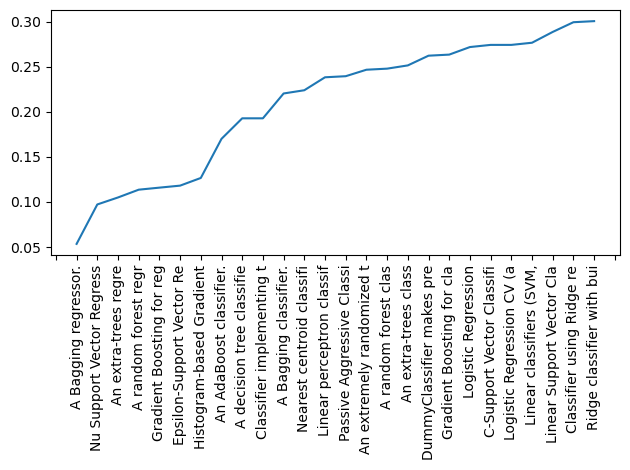

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
ax.plot(df)
ax.set_xticks(ticks=np.arange(len(df.index)),labels=df.index)
ax.xaxis.set_ticklabels(df.index,rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
fig.tight_layout()
plt.show()

we perform less that xgboost..

In [104]:
from sklearn.linear_model import RidgeClassifierCV
algo = RidgeClassifierCV()
algo.fit(X_train, Y_train)
algo.score(X_test, Y_test)

0.3005988023952096

In [105]:
algo.get_params().keys()

dict_keys(['alphas', 'class_weight', 'cv', 'fit_intercept', 'normalize', 'scoring', 'store_cv_values'])

In [114]:
from sklearn.model_selection import GridSearchCV

params={'alphas':[1e-3, 1e-2, 1e-1, 1, 10],
        "class_weight":'balanced',
        "cv":[3,4,5,6]}
grid = GridSearchCV(algo, parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

ValueError: Invalid parameter colsample_bytree for estimator RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])). Check the list of available parameters with `estimator.get_params().keys()`.